In [185]:
import numpy as np

from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import pandas as pd

In [187]:
#load dataframe from csv
demographics_data = pd.read_csv("data/newdata/2018_demographic_data_edited.csv", delimiter=',')
print(demographics_data.shape)
del demographics_data["Geo_ZCTA5"]
del demographics_data["Geo_ZCTA3"]
del demographics_data["Geo_LOGRECNO"]
del demographics_data["Geo_GEOCOMP"]
del demographics_data["Geo_SUMLEV"]
print(demographics_data.shape)

(33120, 2151)
(33120, 2146)


In [204]:
sales_data = pd.read_csv("data/newdata/med_sale_price_yoy.csv", delimiter='	')
sales_data = sales_data.replace(np.nan, 0)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [188]:
null_counts = demographics_data.isnull().sum()
print(null_counts[null_counts > 0])

SE_A01004_001      564
SE_A01004_002      843
SE_A01004_003      897
SE_A10003_001      726
SE_A10003B_001    2496
                  ... 
SE_A13007_009       35
SE_A13007_010       35
SE_A13007_011       35
SE_A10064_001       35
SE_A10064_002       35
Length: 870, dtype: int64


In [189]:
#reduced_demos = demographics_data[["SE_A00002_002", "SE_A10003_001", "SE_B12001_002", "SE_B12001_003", "SE_B12001_004", "SE_A14002_002", "SE_A14002_003", "SE_A14002_004", "SE_A14002_005", "SE_A14002_006", "SE_A14002_007", "SE_A14002_008", "SE_A14002_009", "SE_A14002_010", "SE_A14002_011", "SE_A14002_012", "SE_A14028_001", "SE_A10035B_002", "SE_A10035B_003", "SE_A10035B_004", "SE_A10035B_005", "SE_A10035B_006", "SE_A10035B_007", "SE_A10035B_008", "SE_A10035B_009" ]]
reduced_demos = demographics_data[["SE_A00002_002", "SE_A14028_001", "SE_A14011_001", "SE_A14008_001", "SE_B10040_002", "SE_B10040_003"]]

In [190]:
null_counts = reduced_demos.isnull().sum()
print(null_counts[null_counts > 0])

SE_A14028_001     948
SE_A14011_001    1662
SE_A14008_001    1220
SE_B10040_002      35
SE_B10040_003      35
dtype: int64


In [191]:
reduced_demos = reduced_demos.dropna()
print(reduced_demos.shape)

(31458, 6)


In [192]:
from sklearn.manifold import TSNE

tsne_Transformed = TSNE(n_components=2).fit_transform(reduced_demos)
print(tsne_Transformed.shape)

(31458, 2)


In [193]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# we want to normalize all of our data if possible
sc = StandardScaler()
X_train = sc.fit_transform(train_data_5)
X_test = sc.transform(test_data_5)

#now perform PCA
pca = PCA(n_components=20)
#pca.fit(X_train)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(" percent of variance captured:: ", np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

Visualizing T-SNE

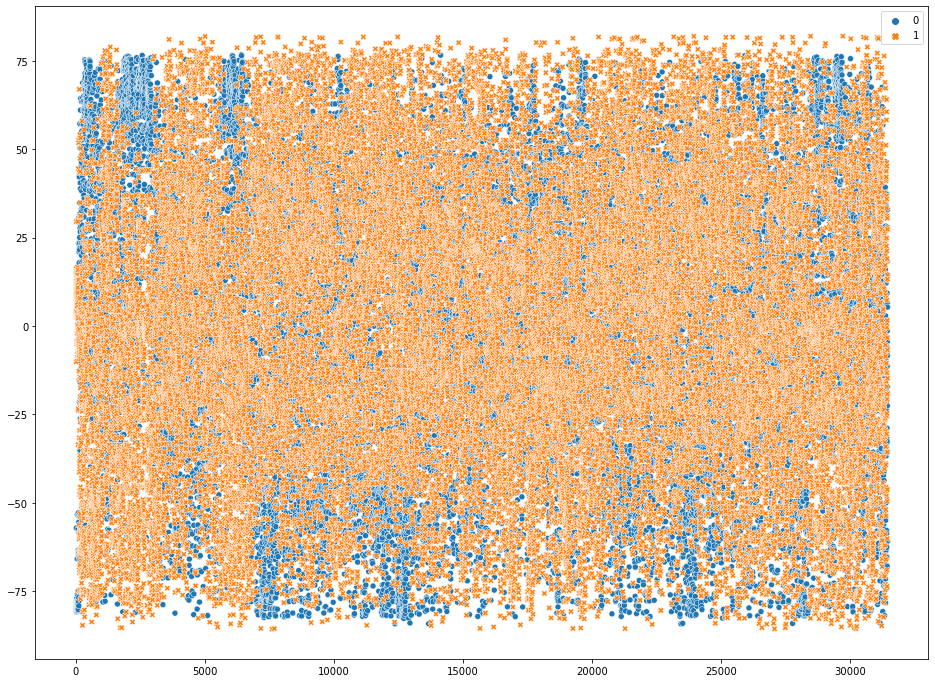

In [199]:
import seaborn as sb

fig = plt.gcf()
fig.set_size_inches(16,12)

sb.scatterplot(data = tsne_Transformed)

plt.show()